In [97]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')


In [98]:
# Reading the data from csv file

ds = pd.read_csv('HR-Employee-Attrition.csv')
ds

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [99]:
type(ds)

pandas.core.frame.DataFrame

In [100]:
# Reading the head of the data
ds.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [101]:
# Checking the shape of the dataset
ds.shape

(1470, 35)

In [102]:
print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (1470, 35)
Shape of dataset after removing duplicates:  (1470, 35)


In [103]:
# checking the columns of the dataset
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [104]:
# checking the data types of columns
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [105]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Statistical Summary

In [106]:
ds.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

There is not particular order followeed between mean and median. Sometimes mean is greater than median and vice versa 

# Data Visualization

In [107]:
# checking if null values are present in the database
ds.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [108]:
# Checking if NaN values are present in the database
ds.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [109]:
ds['EmployeeCount'].isnull().values.any()

False

In [110]:
ds['EmployeeCount'].unique()

array([1], dtype=int64)

In [111]:
ds['StandardHours'].unique()

array([80], dtype=int64)

In [112]:
ds.isnull().values.any()

False

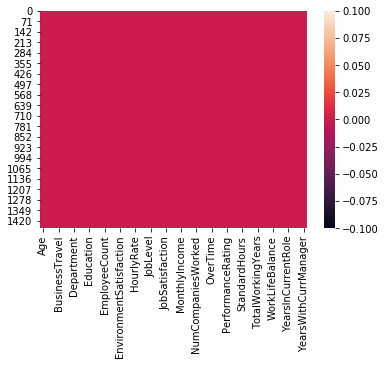

In [113]:
# Checking visualization through heatmap for null values
sns.heatmap(ds.isnull())

# Checking correlation in the dataset

In [114]:
ds.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

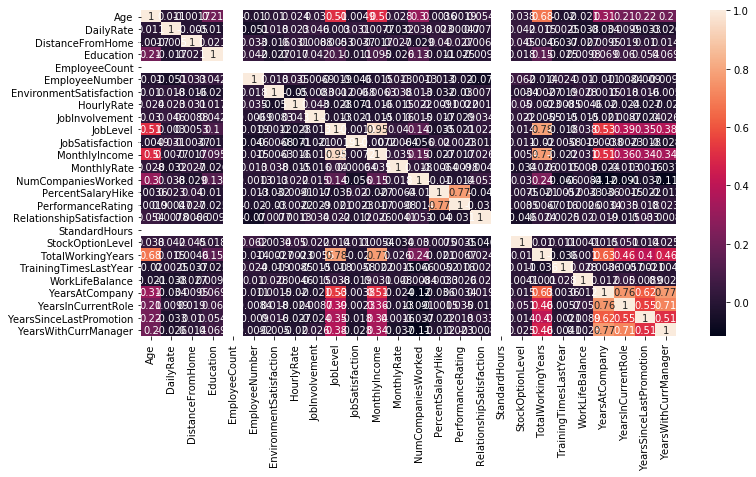

In [115]:
# corelation through heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(ds.corr(), annot=True)
plt.show()

checking the unique values of some columns in the dataset

In [116]:
#Dropping the columns as its not significant
ds.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)

In [117]:
ds.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [118]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [119]:
# It will be used for target variable
ds['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [120]:
ds['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [121]:
ds['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [122]:
ds['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [123]:
ds['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [124]:
ds['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [125]:
ds['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [126]:
ds['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [127]:
ds['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [128]:
ds['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [129]:
ds['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [130]:
ds['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [131]:
ds['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [132]:
ds.groupby(['Department'])['Attrition'].count()

Department
Human Resources            63
Research & Development    961
Sales                     446
Name: Attrition, dtype: int64

In [133]:
ds.groupby(['JobRole'])['Attrition'].count()

JobRole
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
Name: Attrition, dtype: int64

In [134]:
ds.groupby(['Gender'])['Attrition'].count()

Gender
Female    588
Male      882
Name: Attrition, dtype: int64

In [135]:
ds.groupby(['NumCompaniesWorked'])['Attrition'].count()

NumCompaniesWorked
0    197
1    521
2    146
3    159
4    139
5     63
6     70
7     74
8     49
9     52
Name: Attrition, dtype: int64

In [136]:
ds.groupby(['YearsInCurrentRole'])['Attrition'].count()

YearsInCurrentRole
0     244
1      57
2     372
3     135
4     104
5      36
6      37
7     222
8      89
9      67
10     29
11     22
12     10
13     14
14     11
15      8
16      7
17      4
18      2
Name: Attrition, dtype: int64

In [137]:
ds.groupby(['WorkLifeBalance'])['Attrition'].count()

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: Attrition, dtype: int64

In [138]:
ds.groupby(['RelationshipSatisfaction'])['Attrition'].count()

RelationshipSatisfaction
1    276
2    303
3    459
4    432
Name: Attrition, dtype: int64

In [139]:
ds.groupby(['YearsWithCurrManager'])['Attrition'].count()

YearsWithCurrManager
0     263
1      76
2     344
3     142
4      98
5      31
6      29
7     216
8     107
9      64
10     27
11     22
12     18
13     14
14      5
15      5
16      2
17      7
Name: Attrition, dtype: int64

In [140]:
ds.groupby(['YearsAtCompany'])['Attrition'].count()

YearsAtCompany
0      44
1     171
2     127
3     128
4     110
5     196
6      76
7      90
8      80
9      82
10    120
11     32
12     14
13     24
14     18
15     20
16     12
17      9
18     13
19     11
20     27
21     14
22     15
23      2
24      6
25      4
26      4
27      2
29      2
30      1
31      3
32      3
33      5
34      1
36      2
37      1
40      1
Name: Attrition, dtype: int64

In [141]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

Univariate Analysis
cont plot is used to get the count of values of a particular column

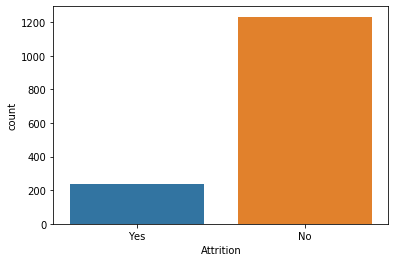

In [142]:
sns.countplot(ds['Attrition'])
plt.show()

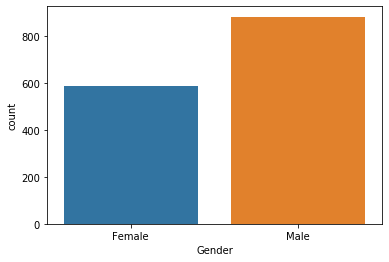

In [143]:
sns.countplot(ds['Gender'])
plt.show()

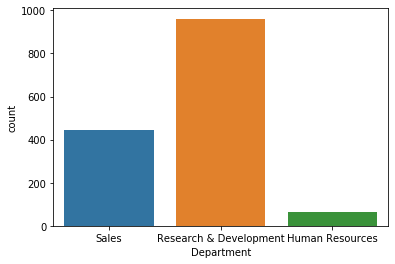

In [144]:
sns.countplot(ds['Department'])
plt.show()

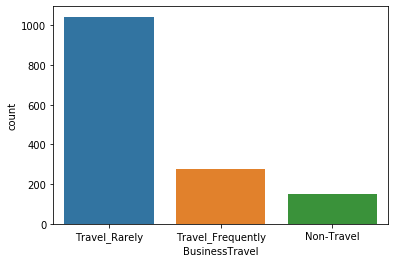

In [145]:
sns.countplot(ds['BusinessTravel'])

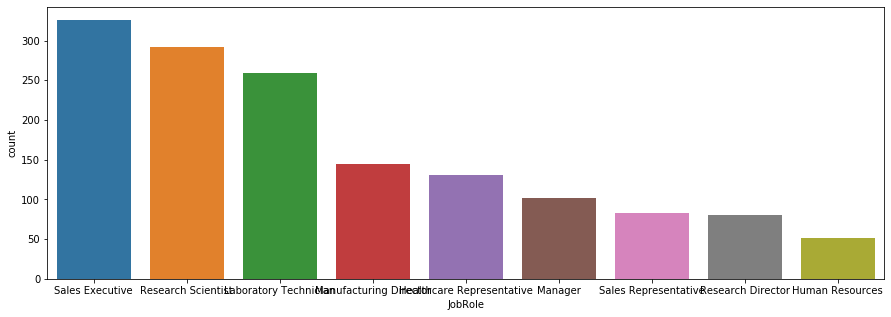

In [146]:
plt.figure(figsize=(15,5))
sns.countplot(ds['JobRole'])

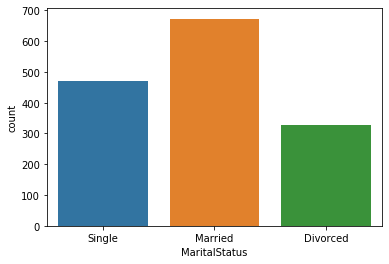

In [147]:
sns.countplot(ds['MaritalStatus'])

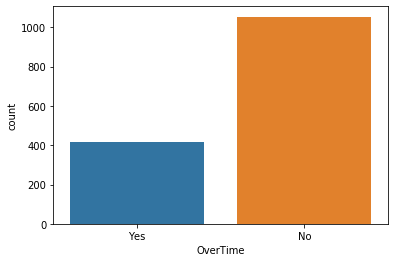

In [148]:
sns.countplot(ds['OverTime'])

In [149]:
ds.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

In [150]:
# Using the LabelEncoder on below vcategorical data to change it to numeric one 
arr = ['Attrition', 'BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
le = LabelEncoder()

for i in arr:
    ds[i] = le.fit_transform(ds[i].astype(str))


In [151]:
ds

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2               1               1                        2  ...   
1             1               1               2                        3  ...   
2             2               4               4                        4  ...   
3             4               1               5                        4  ...   
4             1               3               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2               3            2061                        3  ...   
1466          1               3            2062                        4  ...   
1467          3               1            2064                        2  ...   
1468          3               3            2065                        4  ...   
1469          3               3            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

In [152]:
ds.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany

# Plotting Outliers

Univariate Analysis

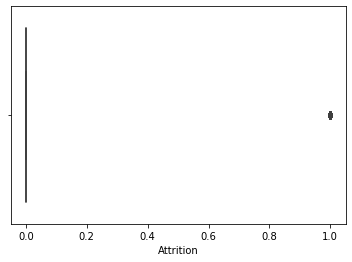

In [153]:
sns.boxplot(ds['Attrition'])
plt.show()

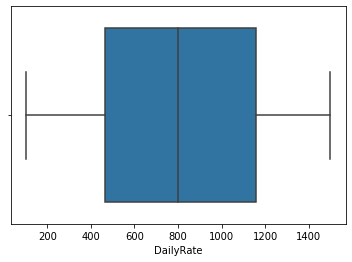

In [154]:
sns.boxplot(ds['DailyRate'])

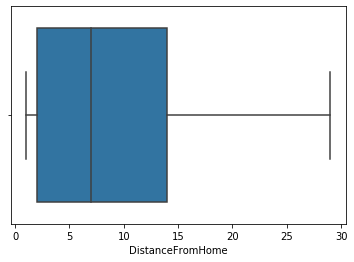

In [155]:
sns.boxplot(ds['DistanceFromHome'])

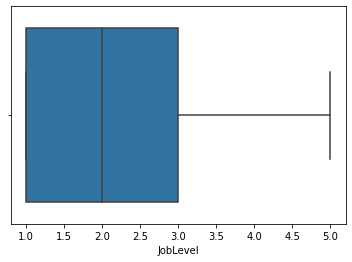

In [156]:
sns.boxplot(ds['JobLevel'])

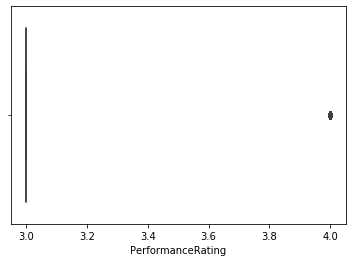

In [157]:
sns.boxplot(ds['PerformanceRating'])

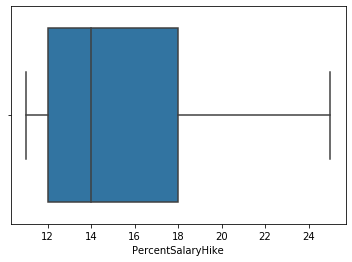

In [158]:
sns.boxplot(ds['PercentSalaryHike'])

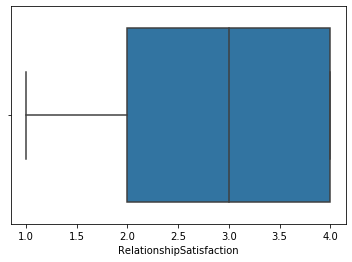

In [159]:
sns.boxplot(ds['RelationshipSatisfaction'])

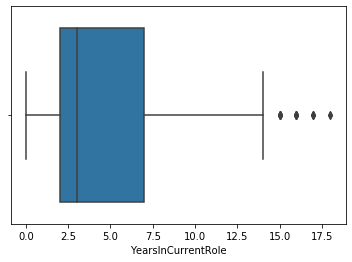

In [160]:
sns.boxplot(ds['YearsInCurrentRole'])

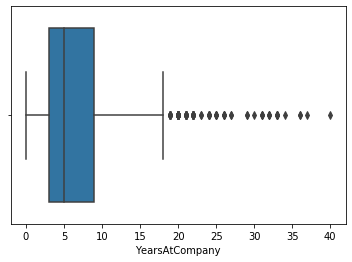

In [161]:
sns.boxplot(ds['YearsAtCompany'])

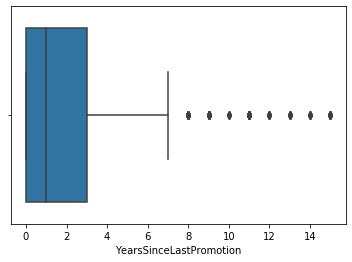

In [162]:
sns.boxplot(ds['YearsSinceLastPromotion'])

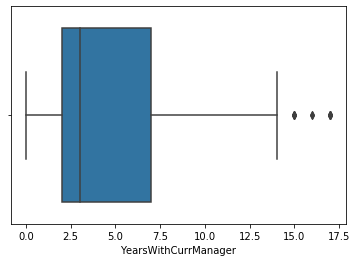

In [163]:
sns.boxplot(ds['YearsWithCurrManager'])

Checking the skewness of data using distribution plot

# Univariate Analysis

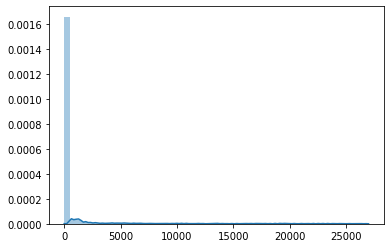

In [164]:
sns.distplot(ds, kde=True)

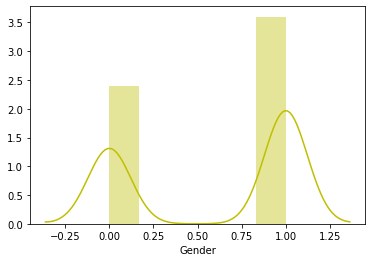

In [165]:
sns.distplot(ds['Gender'], color='y')
plt.show()


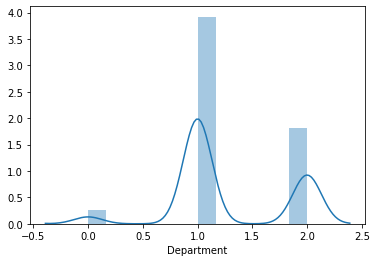

In [166]:
sns.distplot(ds['Department'], hist=1)
plt.show()

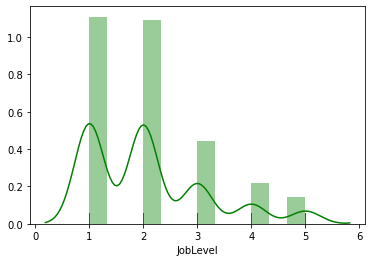

In [167]:
sns.distplot(ds['JobLevel'], color='g', rug=1)

In [168]:
collist = ds.columns.values
collist

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [169]:
ncols = 35
nrows = 12


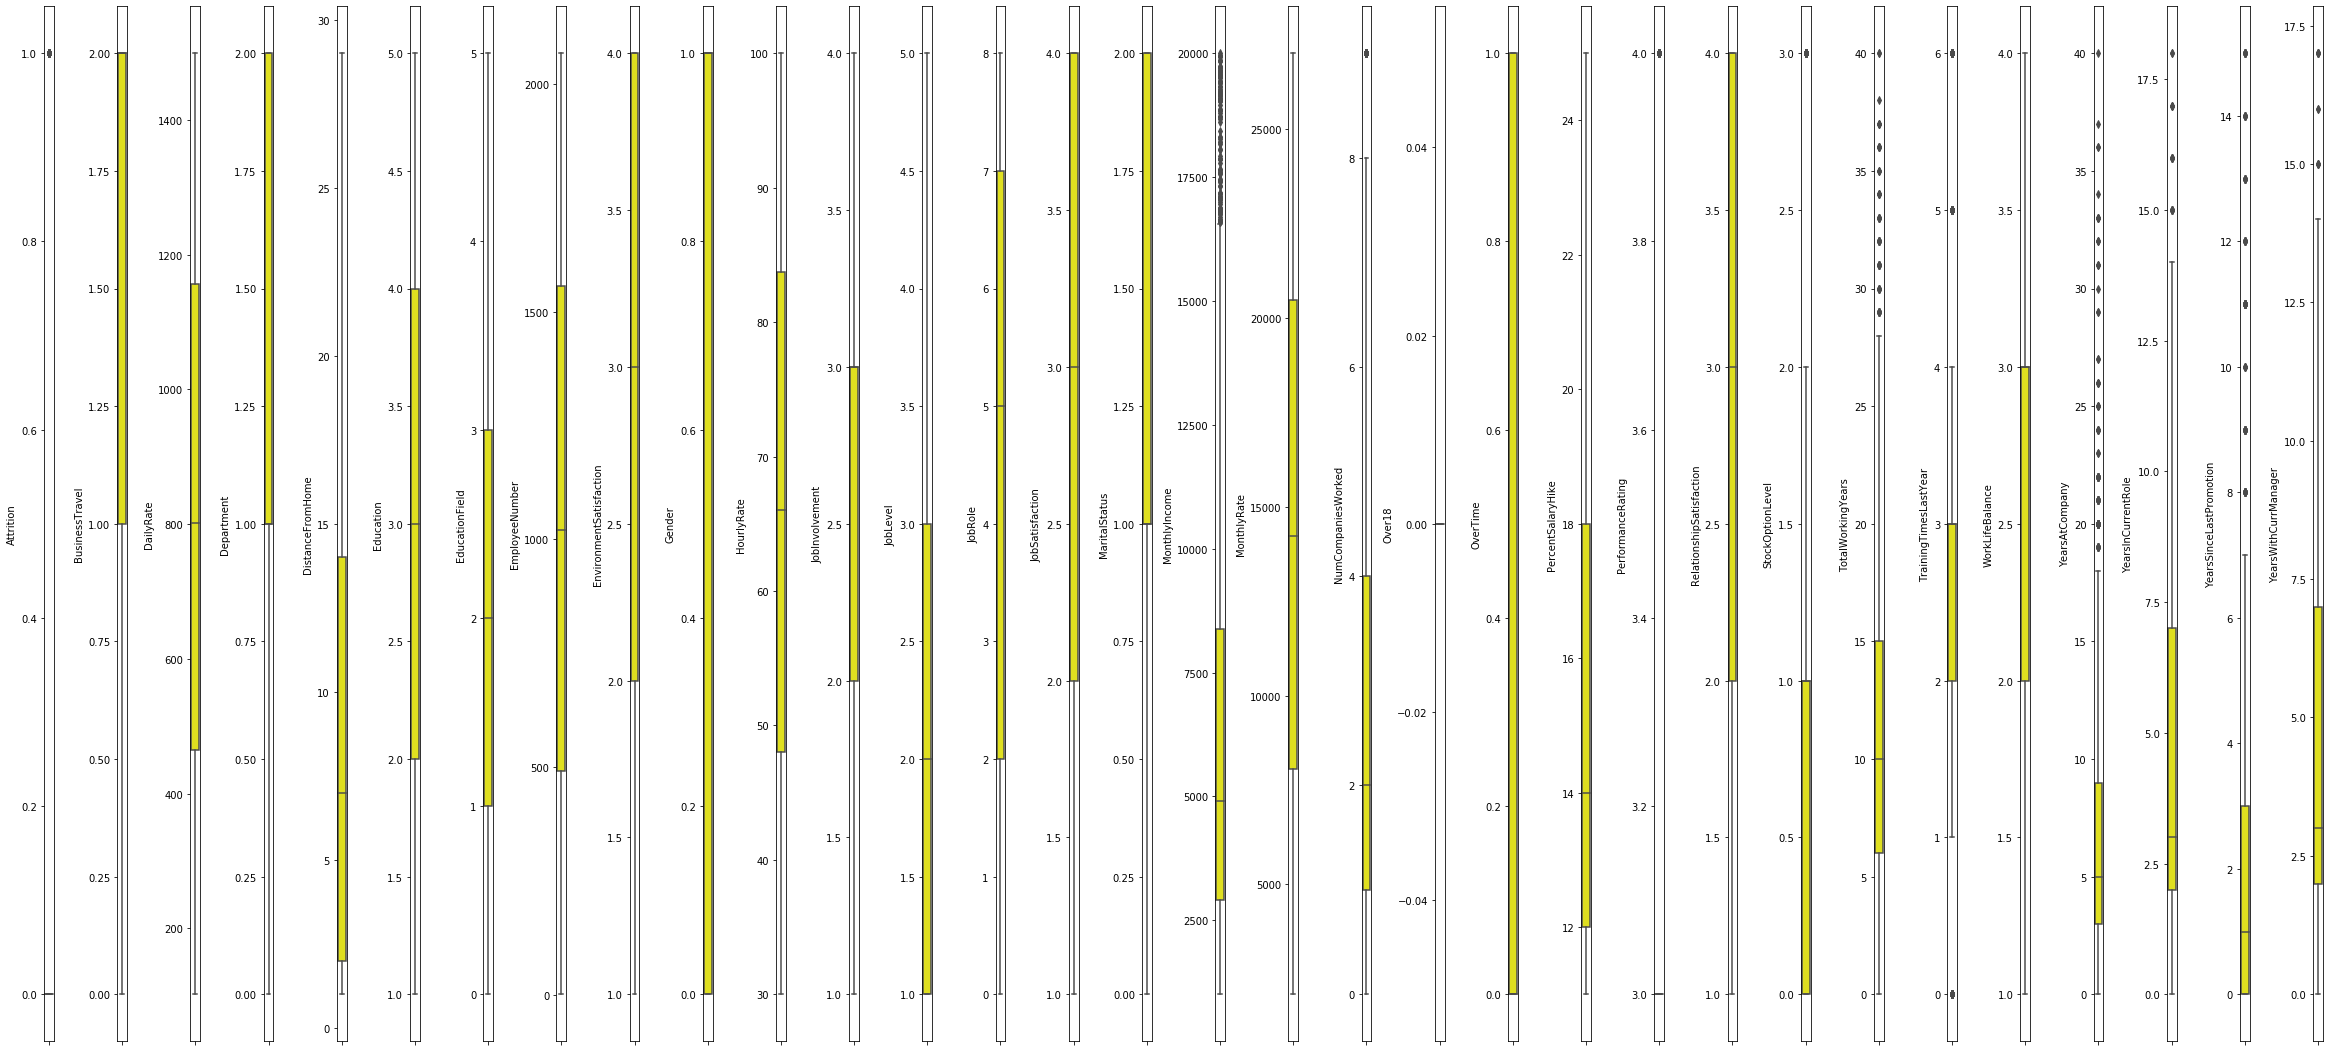

In [170]:
# Boxplot for all the columns
plt.figure(figsize=(ncols, 5* ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

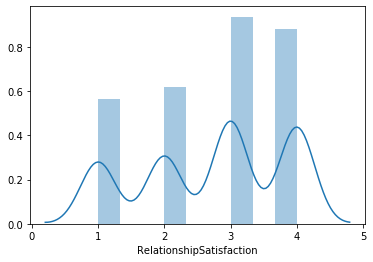

In [171]:
sns.distplot(ds['RelationshipSatisfaction'])
plt.show()

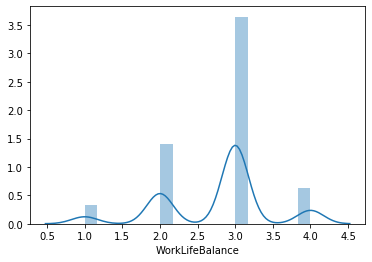

In [172]:
sns.distplot(ds['WorkLifeBalance'])
plt.show()

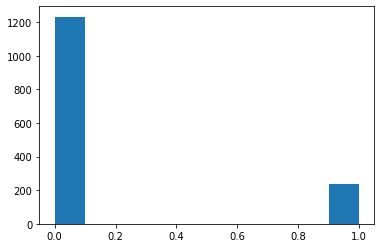

In [173]:
plt.hist(ds['Attrition'])
plt.show()

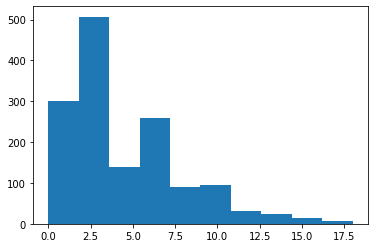

In [174]:
plt.hist(ds['YearsInCurrentRole'])
plt.show()

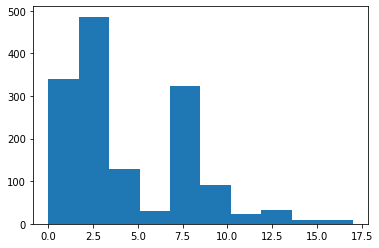

In [175]:
plt.hist(ds['YearsWithCurrManager'])
plt.show()

violinplot shows where the maximum values lies of a particular data

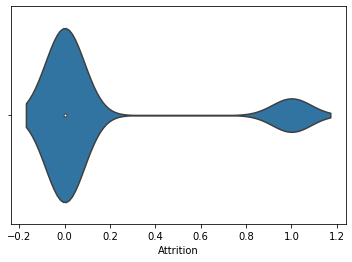

In [176]:
sns.violinplot(ds['Attrition'])
plt.show()

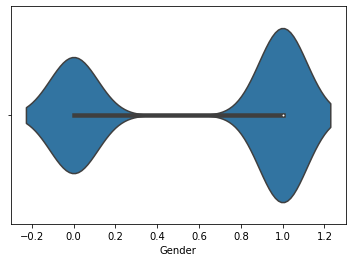

In [177]:
sns.violinplot(ds['Gender'])

# Bivariate Analysis

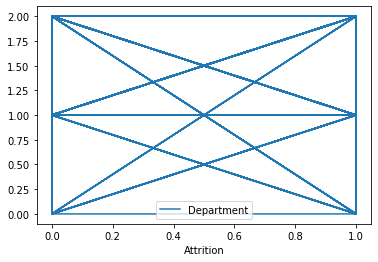

In [178]:
ds.plot(x='Attrition', y='Department', kind='line')
plt.show()

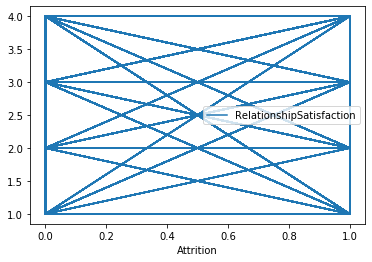

In [179]:
ds.plot(x='Attrition', y='RelationshipSatisfaction', kind='line')
plt.show()

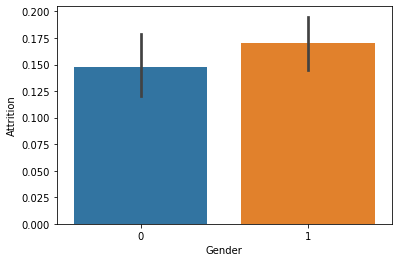

In [180]:
sns.barplot(x='Gender', y='Attrition', data=ds)
plt.show()

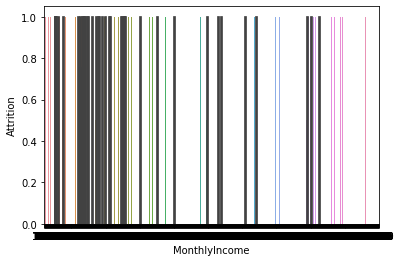

In [181]:
sns.barplot(x='MonthlyIncome', y='Attrition', data=ds)
plt.show()

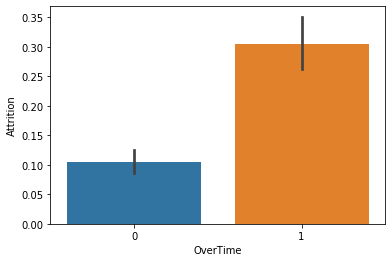

In [182]:
sns.barplot(x='OverTime', y='Attrition', data=ds)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

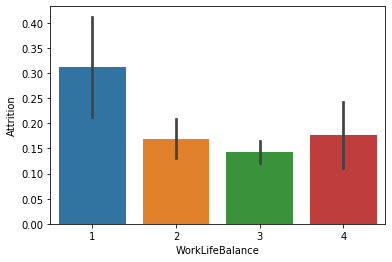

In [183]:
sns.barplot(x='WorkLifeBalance', y='Attrition', data=ds)
plt.show

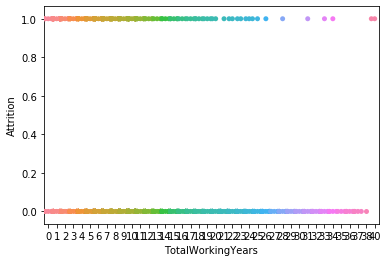

In [184]:
sns.swarmplot(x='TotalWorkingYears', y='Attrition', data=ds)
plt.show()

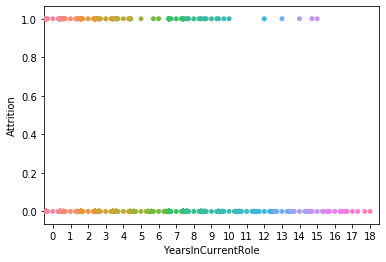

In [185]:
sns.swarmplot(x='YearsInCurrentRole', y='Attrition', data=ds)
plt.show()

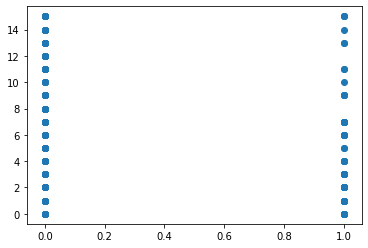

In [186]:
plt.scatter(ds['Attrition'], ds['YearsSinceLastPromotion'])
plt.show()

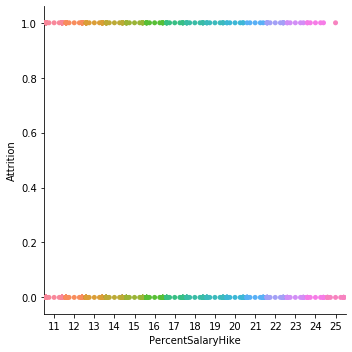

In [187]:
sns.catplot(x='PercentSalaryHike', y='Attrition', data=ds, kind='swarm')

Visualization through pairplot

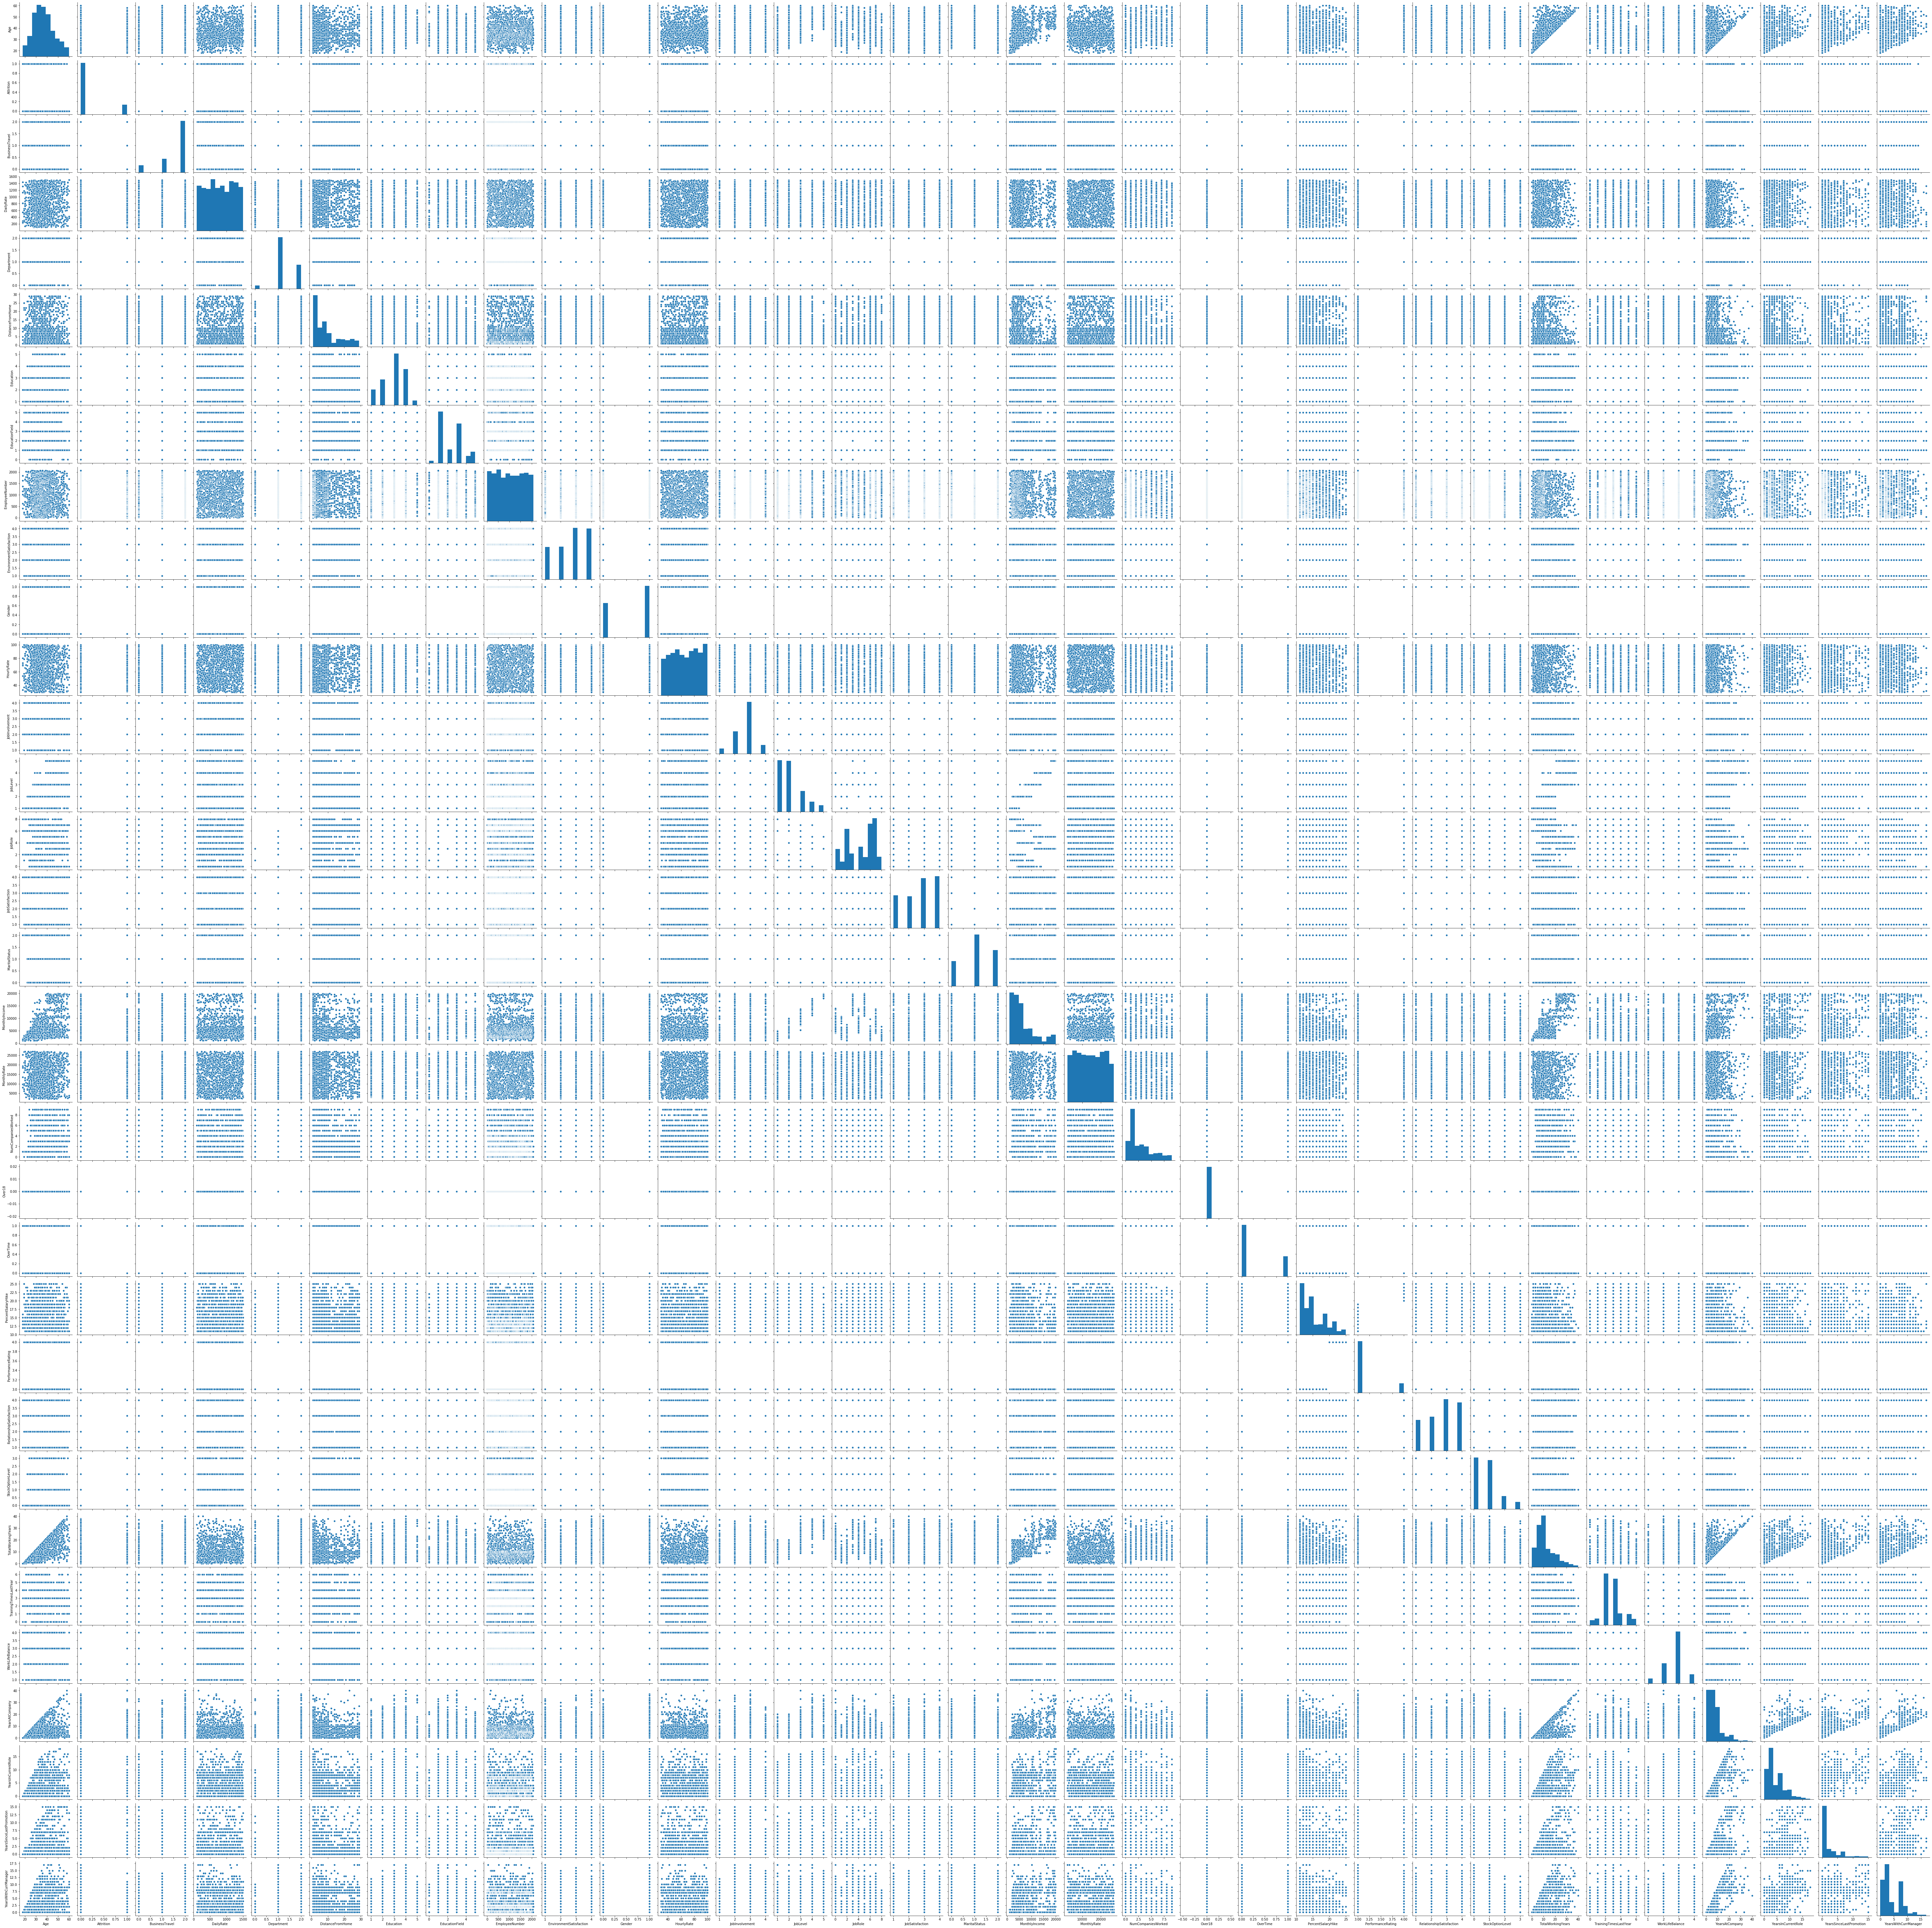

In [188]:
sns.pairplot(ds)
plt.show()

Checking the skewness of data

In [189]:
ds

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  ...  \
0             2               1               1                        2  ...   
1             1               1               2                        3  ...   
2             2               4               4                        4  ...   
3             4               1               5                        4  ...   
4             1               3               7                        1  ...   
...         ...             ...             ...                      ...  ...   
1465          2               3            2061                        3  ...   
1466          1               3            2062                        4  ...   
1467          3               1            2064                        2  ...   
1468          3               3            2065                        4  ...   
1469          3               3            2068                        2  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                 

In [190]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore

for i in ds.columns:
    ds_copy = ds.drop(i, axis=1 )
    z = np.abs(zscore(ds_copy))
    ds_new = ds_copy [(z<3).all(axis=1)]
    print (ds_new.shape, i)

(0, 32) Age
(0, 32) Attrition
(0, 32) BusinessTravel
(0, 32) DailyRate
(0, 32) Department
(0, 32) DistanceFromHome
(0, 32) Education
(0, 32) EducationField
(0, 32) EmployeeNumber
(0, 32) EnvironmentSatisfaction
(0, 32) Gender
(0, 32) HourlyRate
(0, 32) JobInvolvement
(0, 32) JobLevel
(0, 32) JobRole
(0, 32) JobSatisfaction
(0, 32) MaritalStatus
(0, 32) MonthlyIncome
(0, 32) MonthlyRate
(0, 32) NumCompaniesWorked
(1387, 32) Over18
(0, 32) OverTime
(0, 32) PercentSalaryHike
(0, 32) PerformanceRating
(0, 32) RelationshipSatisfaction
(0, 32) StockOptionLevel
(0, 32) TotalWorkingYears
(0, 32) TrainingTimesLastYear
(0, 32) WorkLifeBalance
(0, 32) YearsAtCompany
(0, 32) YearsInCurrentRole
(0, 32) YearsSinceLastPromotion
(0, 32) YearsWithCurrManager


In [191]:
ds.drop(columns=['Over18'], inplace=True)

In [192]:
# Commented

# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore
z_scr = abs(zscore(ds))
print ('Before removing zscore: ', ds.shape)

ds_final = ds.loc[(z_scr < 3).all(axis=1)]
print ("After removing zscore: ", ds_final.shape)

Before removing zscore:  (1470, 32)
After removing zscore:  (1387, 32)


In [193]:
# Assigning the input and output data
df_x = ds.drop(columns = ['Attrition'])
y = ds['Attrition']

In [194]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [195]:
ds.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrent

In [196]:
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.446350        0.590048   0.742527    1.401512         -1.010909   
1     1.322365       -0.913194  -1.297775   -0.493817         -0.147150   
2     0.008343        0.590048   1.414363   -0.493817         -0.887515   
3    -0.429664       -0.913194   1.461466   -0.493817         -0.764121   
4    -1.086676        0.590048  -0.524295   -0.493817         -0.887515   
...        ...             ...        ...         ...               ...   
1465 -0.101159       -0.913194   0.202082   -0.493817          1.703764   
1466  0.227347        0.590048  -0.469754   -0.493817         -0.393938   
1467 -1.086676        0.590048  -1.605183   -0.493817         -0.640727   
1468  1.322365       -0.913194   0.546677    1.401512         -0.887515   
1469 -0.320163        0.590048  -0.432568   -0.493817         -0.147150   

      Education  EducationField  EmployeeNumber  EnvironmentSatisfaction  \
0     -0.891688       -0.937414       -1.701283                -0.660531   
1     -1.868426       -0.937414       -1.699621                 0.254625   
2     -0.891688        1.316673       -1.696298                 1.169781   
3      1.061787       -0.937414       -1.694636                 1.169781   
4     -1.868426        0.565311       -1.691313                -1.575686   
...         ...             ...             ...                      ...   
1465  -0.891688        0.565311        1.721670                 0.254625   
1466  -1.868426        0.565311        1.723332                 1.169781   
1467   0.085049       -0.937414        1.726655                -0.660531   
1468   0.085049        0.565311        1.728317                 1.169781   
1469   0.085049        0.565311        1.733302                -0.660531   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0    -1.224745  ...          -0.426230                 -1.584178   
1     0.816497  ...           2.346151                  1.191438   
2     0.816497  ...          -0.426230                 -0.658973   
3    -1.224745  ...          -0.426230                  0.266233   
4     0.816497  ...          -0.426230                  1.191438   
...        ...  ...                ...                       ...   
1465  0.816497  ...          -0.426230                  0.266233   
1466  0.816497  ...          -0.426230                 -1.584178   
1467  0.816497  ...           2.346151                 -0.658973   
1468  0.816497  ...          -0.426230                  1.191438   
1469  0.816497  ...          -0.426230                 -1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.932014          -0.421642              -2.171982   
1             0.241988          -0.164511               0.155707   
2            -0.932014          -0.550208               0.155707   
3            -0.932014          -0.421642               0.155707   
4             0.241988          -0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988          -0.293077               1.707500   
1467          0.241988          -0.678774              -2.171982   
1468         -0.932014           0.735447               0.155707   
1469         -0.932014          -0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.493820       -0.164613           -0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096       -1.144294           -1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096       -0.817734           -0.615492   
...               ...             ...                 ...   
1465         0.338096       -0.327893           -0.615492   
1466         0.338096       -0.001333            0.764998   
1467         0

In [197]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [198]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [200]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()
LR = LogisticRegression()
GNB = GaussianNB()

In [201]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RFC))
models.append(('LogisticRegression', LR))
models.append(('GaussianNB', GNB))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  55  is:  0.8775510204081632
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


Accu

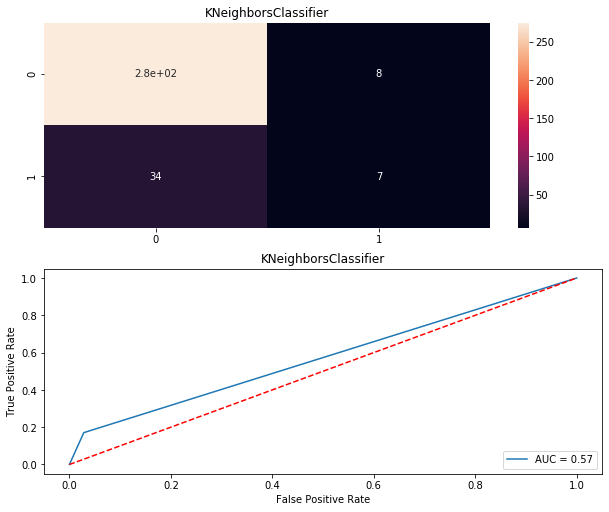

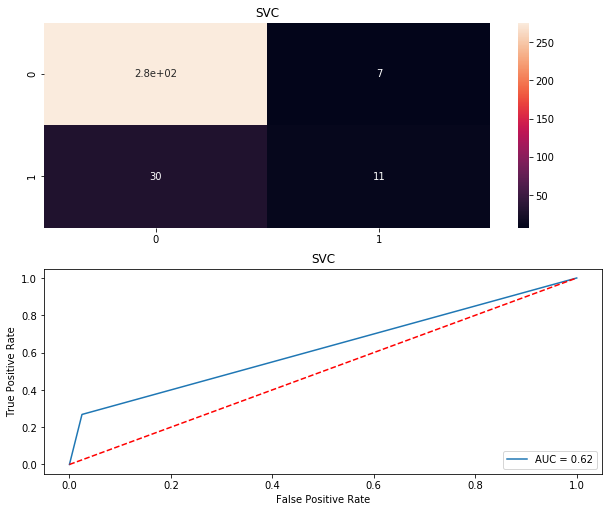

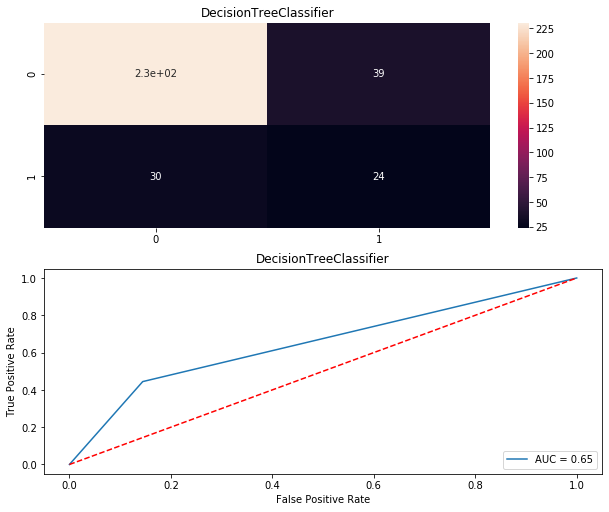

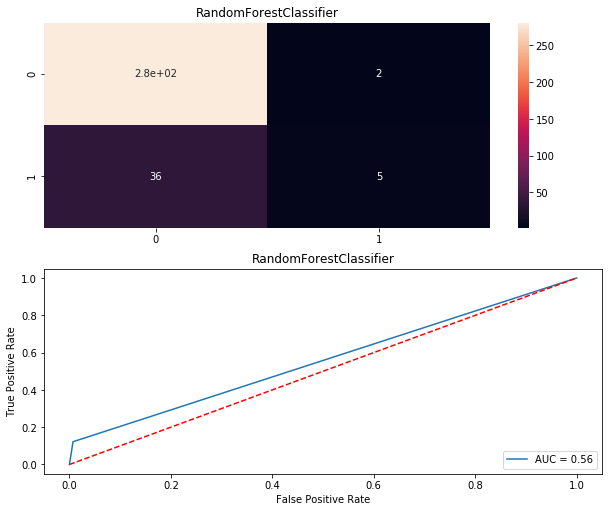

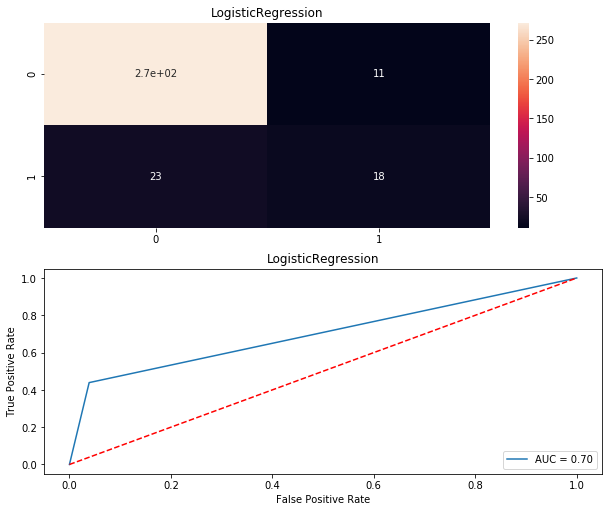

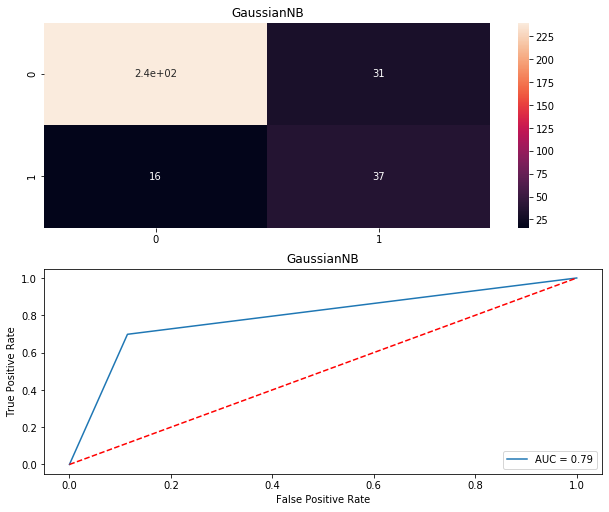

In [202]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .22)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [203]:
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

Model  Accuracy_Score  Cross Val Score  ROC_AUC_Curve  \
0    KNeighborsClassifier       87.037037        84.625850      57.123158   
1                     SVC       88.580247        85.714286      62.177885   
2  DecisionTreeClassifier       78.703704        75.782313      65.000000   
3  RandomForestClassifier       88.271605        85.782313      55.744204   
4      LogisticRegression       89.506173        86.598639      70.007757   
5              GaussianNB       85.493827        78.639456      79.186103   

   RandomState  
0           55  
1           55  
2           99  
3           55  
4           55  
5           84

In [204]:
#I chose LogisticRegression as it gives the best results 

# GridSearchCV for LogisticRegression
parameters = { 'penalty': ['l1', 'l2'], 'C': [0.001, 1, 10, 100, 1000, 0.01, 0.1]}
gsc = GridSearchCV(estimator = LR, param_grid = parameters, cv=10)
gsc.fit(x,y)
gsc.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [205]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=55, test_size = 0.20)
lreg = LogisticRegression(C= 0.1, penalty= 'l2')
lreg.fit(x_train, y_train)
y_pred =  lreg.predict(x_test)
print (y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [206]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_HRAnalytics.csv')

accuracy score:  0.9013605442176871
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       260
           1       0.63      0.35      0.45        34

    accuracy                           0.90       294
   macro avg       0.78      0.66      0.70       294
weighted avg       0.89      0.90      0.89       294

Confusion_matrix:  [[253   7]
 [ 22  12]]
cross val score:  0.8680272108843535
roc auc score:  0.6630090497737556
AxesSubplot(0.125,0.808774;0.62x0.0712264)





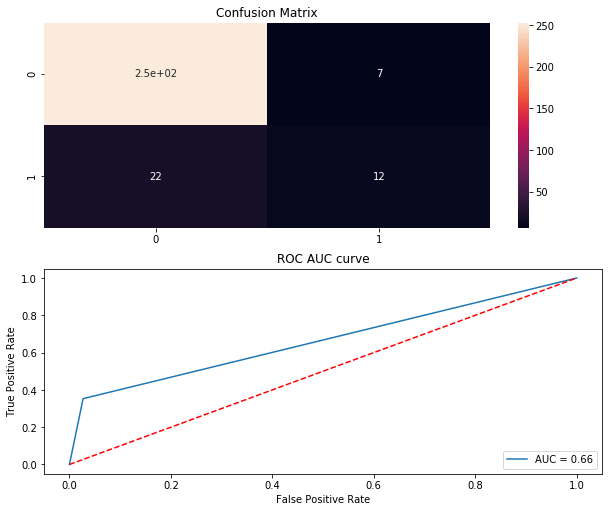

In [207]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(lreg, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [208]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(lreg, 'hranalytics.pkl')
#clf = joblib.load('hranalytics.pkl')
#clf.predict(x_test)

['hranalytics.pkl']